In [1]:
import pandas as pd
import numpy as np
audata = pd.read_csv("RESULT_new3/hc-rb/hc2110_rb2110_final.csv", index_col=[0], parse_dates=[0])
audata['trading_date'] = pd.to_datetime(audata['trading_date'])
audata

,id_A,ask_A,ask_vol_A,bid_A,bid_vol_A,last_A,id_B,ask_B,ask_vol_B,bid_B,bid_vol_B,last_B,spd_ask,spd_bid,spd_last,trading_date
date_time,,,,,,,,,,,,,,,,
2020-10-15 21:00:00.500,hc2110,3588.0,10.0,3481.0,7.0,3555.0,rb2110,3452.0,1.0,3445.0,10.0,3442.0,36.0,136.0,113.0,2020-10-16
2020-10-15 21:00:09.500,hc2110,3588.0,10.0,3500.0,2.0,3500.0,rb2110,3443.0,5.0,3440.0,24.0,3440.0,60.0,145.0,60.0,2020-10-16
2020-10-15 21:00:15.500,hc2110,3588.0,10.0,3481.0,7.0,3500.0,rb2110,3442.0,12.0,3440.0,8.0,3442.0,41.0,146.0,58.0,2020-10-16
2020-10-15 21:00:25.500,hc2110,3587.0,1.0,3481.0,7.0,3500.0,rb2110,3443.0,5.0,3441.0,1.0,3443.0,40.0,144.0,57.0,2020-10-16
2020-10-15 21:00:34.500,hc2110,3481.0,3.0,3480.0,97.0,3481.0,rb2110,3448.0,2.0,3442.0,1.0,3441.0,38.0,33.0,40.0,2020-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 14:59:28.500,hc2110,5322.0,31.0,5321.0,144.0,5321.0,rb2110,4978.0,284.0,4977.0,58.0,4977.0,344.0,344.0,344.0,2021-05-24
2021-05-24 14:59:36.000,hc2110,5322.0,268.0,5321.0,12.0,5321.0,rb2110,4979.0,240.0,4978.0,167.0,4978.0,343.0,343.0,343.0,2021-05-24
2021-05-24 14:59:45.000,hc2110,5320.0,76.0,5319.0,220.0,5320.0,rb2110,4976.0,26.0,4975.0,397.0,4976.0,344.0,344.0,344.0,2021-05-24


In [17]:
import datetime
start_date = datetime.datetime(2021, 3, 10)
end_date = datetime.datetime(2021, 5, 24)
data_all = audata.loc[audata.trading_date >= start_date]
data_all = data_all.loc[data_all.trading_date <= end_date]

#删除为0的行，排除涨跌停导致价格为0
data_all.drop( index = data_all.ask_A[data_all.ask_A == 0].index,inplace = True)
data_all.drop( index = data_all.bid_A[data_all.bid_A == 0].index,inplace = True)
data_all.drop( index = data_all.ask_B[data_all.ask_B == 0].index,inplace = True)
data_all.drop( index = data_all.bid_B[data_all.bid_B == 0].index,inplace = True)

#获取到交易日，后面根据交易日做循环
pd_date_list = pd.DataFrame()
pd_date_list['time_stamp'] = data_all['trading_date']
# normalize, count values, convert to dataframe
pd_date_list = pd_date_list['time_stamp'].dt.normalize().value_counts().to_frame().reset_index()
# rename columns
pd_date_list.columns = ['time_stamp', 'count']
pd_date_list.sort_values(by='time_stamp',inplace=True)
pd_date_list = pd_date_list.reset_index()
pd_date_list.drop(columns='index',inplace=True)
pd_date_list


,time_stamp,count
0,2021-03-10,2652
1,2021-03-11,2648
2,2021-03-12,2698
3,2021-03-15,2685
4,2021-03-16,2680
5,2021-03-17,2668
6,2021-03-18,2694
7,2021-03-19,2703
8,2021-03-22,2700
9,2021-03-23,2727


In [18]:
import statsmodels.api as sm
import datetime
holding = False
direction = None  # "a-b", "b-a"
stop_event = "none"
enter_record = []
out_record = []
trading_date_in = ""

pure_pnl = []
trading_cost = []
pnl = []
cost_rate = 1 / 10000
delta_days = 1
K = 0
beta = 0
# data_all['trading_date']  =  pd.to_datetime(data_all['trading_date']) #处理交易日时刻
#取最近5天数据
for date_index in range(0,len(pd_date_list) - delta_days):

    #根据日期获取拟合数据
    start_time = pd_date_list['time_stamp'].iloc[date_index]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]
    #使用数据的成交价拟合beta
    model = sm.OLS(data.last_A, data.last_B).fit()
    beta = model.params['last_B']
    eps = data.last_A - data.last_B * beta #生成拟合后数据

    #根据日期获取交易数据       
    start_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]
    end_time = pd_date_list['time_stamp'].iloc[date_index + delta_days]  + pd.Timedelta("1 day")
    test_data = data_all[(data_all['trading_date'] >= start_time) & (data_all['trading_date'] < end_time)]

    #根据beta生产对手价的ask和bid序列
    eps2_ask = test_data.bid_A - test_data.ask_B * beta
    eps2_bid = test_data.ask_A - test_data.bid_B * beta
    #生成实际的成交的ask和bid价格（由于实际交易都是1:1）
    Spread2_ask = test_data.bid_A - test_data.ask_B
    Spread2_bid = test_data.ask_A - test_data.bid_B

    print(" ")
    print('test_day:',start_time)
    print(model.params)

    #进入交易
    #生成交易信号阈值
    K = 1
    up_threshold =  K * np.std(eps)
    down_threshold = - up_threshold

    #生成止损信号阈值
    up_threshold_stop = np.std(eps) * 12
    down_threshold_stop = -up_threshold_stop
    #生成最大亏损信号阈值
    biggest_lost = -50

    #生成平仓信号阈值
    up_close_threshold = up_threshold - 4
    down_close_threshold = down_threshold + 4

    print('beta:',beta)
    print('阈值：',up_threshold)
    print('止损点：',up_threshold_stop)

    #遍历数据判断交易
    for i, v in enumerate(eps2_ask.values):
        #交易时间点判断:去除开盘前10分钟和收盘前十分钟
        start_time1 = datetime.time(21,10,0) #夜盘开盘
        start_time2 = datetime.time(9,10,0) #早上开盘

        end_time1 = datetime.time(0,50,0) #夜盘收盘
        end_time2 = datetime.time(14,50,0) #下午收盘
        #判断是否在我们规定交易时段
        if (eps2_ask.index[i].time() > start_time1 or eps2_ask.index[i].time() < end_time1) or \
            (eps2_ask.index[i].time() > start_time2 and eps2_ask.index[i].time() < end_time2):

            ask_price = eps2_ask[i] #获取价格
            bid_price = eps2_bid[i]
            if not holding:
                # 判断进场条件
                if ask_price > up_threshold and stop_event != 'up_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'b-a'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'b-a进场', Spread2_ask[i], ask_price,'--',len(enter_record))
                    #记录进出场信息
                    enter_record.append((Spread2_ask[i], ask_price,test_data.index[i],direction))
                elif bid_price < down_threshold and stop_event != 'down_stop':
                    holding = True
                    stop_event = "none"
                    direction = 'a-b'
                    trading_date_in = test_data.trading_date[i]
                    print(test_data.index[i],'a-b进场', Spread2_bid[i], bid_price,'--',len(enter_record))
                    enter_record.append((Spread2_bid[i], bid_price,test_data.index[i],direction))
                    
            elif holding:
                # 判断离场条件
                if direction == 'a-b' and ask_price > down_close_threshold:
                    holding = False
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price < up_close_threshold:
                    holding = False
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2       
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append((Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'b-a出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)

                #判断止损条件
                elif direction == 'a-b' and ask_price < down_threshold_stop:
                    holding = False
                    stop_event = 'down_stop'               
                    out_price = Spread2_ask[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (out_price - last_enter_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 

                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    print(test_data.index[i],'a-b止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                    
                    
                elif direction =='b-a' and bid_price > up_threshold_stop:
                    holding = False
                    stop_event = 'up_stop'
                    out_price = Spread2_bid[i]
                    last_enter_price = enter_record[-1][0]
                    single_ret = (last_enter_price - out_price)
                    if trading_date_in == test_data.trading_date[i]:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                    else:
                        single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2        
                    
                    pure_pnl.append(single_ret)
                    trading_cost.append(single_cost)
                    pnl.append(single_ret - single_cost)

                    print(test_data.index[i],'b-a止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                    out_record.append(( Spread2_bid[i], bid_price,test_data.index[i],single_ret,single_cost))
                else: #判断最大亏损有没有达到阈值
                    if direction == 'a-b':
                        out_price = Spread2_ask[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (out_price - last_enter_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'down_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2 
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'a-b收益止损出场', Spread2_ask[i], ask_price,'ret:',single_ret - single_cost)
                            out_record.append(( Spread2_ask[i], ask_price,test_data.index[i],single_ret,single_cost))
                    elif direction =='b-a':
                        out_price = Spread2_bid[i]
                        last_enter_price = enter_record[-1][0]
                        single_ret = (last_enter_price - out_price)
                        if single_ret < biggest_lost:
                            holding = False
                            stop_event = 'up_stop'
                            if trading_date_in == test_data.trading_date[i]:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i])
                            else:
                                single_cost = cost_rate * (test_data.last_A[i] + test_data.last_B[i]) * 2         
                            pure_pnl.append(single_ret)
                            trading_cost.append(single_cost)
                            pnl.append(single_ret - single_cost)

                            print(test_data.index[i],'b-a收益止损出场', Spread2_bid[i], bid_price,'ret:',single_ret - single_cost)
                            out_record.append((Spread2_bid[i], bid_price, test_data.index[i],single_ret,single_cost))

            
if holding:
    if direction == 'a-b':
        single_ret = (Spread2_ask[i-10] - enter_record[-1][0])
    else:
        single_ret = (enter_record[-1][0] - Spread2_bid[i-10])
    
    if trading_date_in == test_data.trading_date[i-10]:
        single_cost = cost_rate * (test_data.last_A[i-10] + test_data.last_B[i-10])
    else:
        single_cost = cost_rate * (test_data.last_A[i-10] + test_data.last_B[i-10]) * 2 
    pure_pnl.append(single_ret)
    trading_cost.append(single_cost)
    pnl.append(single_ret - single_cost)

    out_record.append((Spread2_ask[i-10], eps2_ask[i-10], test_data.index[i-10],single_ret,single_cost))
    print('还有持仓，强平',Spread2_ask[i-10], eps2_ask[i-10],'ret:',single_ret - single_cost)

#做汇总处理，生成交易日志和结果。
df_record = pd.DataFrame()
index_list = []
direction_list = []
in_out_price = []
in_out_eps_price = []
ret_list = []
cost_list = []
pure_ret_list = []
for j in range(0,len(enter_record)):
    #更新index
    index_list.append(enter_record[j][2])
    index_list.append(out_record[j][2])
    #更新方向：
    direction_list.append(enter_record[j][3] + ' in')
    direction_list.append(enter_record[j][3] + ' out')
    #更新进出场价格-原始和eps
    in_out_price.append(enter_record[j][0])
    in_out_price.append(out_record[j][0])

    in_out_eps_price.append(enter_record[j][1])
    in_out_eps_price.append(out_record[j][1])

    #更新成本和收益
    pure_ret_list.append(0) #进场为0
    pure_ret_list.append(out_record[j][3]) #出场记录

    cost_list.append(0) #进场为0
    cost_list.append(out_record[j][4]) #出场记录

    ret_list.append(0) #进场为0
    ret_list.append(out_record[j][3] - out_record[j][4]) #出场记录

#转换为datafram
df_record = data_all.loc[index_list]
df_record['trading_direction'] = direction_list
df_record['in_out_price'] = in_out_price
df_record['in_out_eps_price'] = in_out_eps_price
df_record['pure_return'] = pure_ret_list
df_record['trading cost'] = cost_list
df_record['final return'] = ret_list


: 2021-03-15 00:00:00
last_B    1.042273
dtype: float64
beta: 1.0422727054246568
阈值： 9.409218476614264
止损点： 112.91062171937116
 
test_day: 2021-03-16 00:00:00
last_B    1.049142
dtype: float64
beta: 1.049142089691368
阈值： 11.51882409580159
止损点： 138.22588914961906
2021-03-15 21:10:02.500000 b-a出场 232.0 1.6218835268673502 ret: -23.9216
2021-03-15 21:19:10 a-b进场 218.0 -11.73926930714515 -- 3
2021-03-15 21:22:55 a-b出场 223.0 -7.083263934984643 ret: 4.0411
2021-03-15 22:05:10 a-b进场 218.0 -12.083263934984643 -- 4
 
test_day: 2021-03-17 00:00:00
last_B    1.042281
dtype: float64
beta: 1.0422811881174205
阈值： 17.096800539580883
止损点： 205.1616064749706
2021-03-16 22:17:48 a-b出场 184.0 -12.311556429183838 ret: -35.894
2021-03-16 22:30:21.500000 a-b进场 179.0 -17.776649498475308 -- 5
 
test_day: 2021-03-18 00:00:00
last_B    1.036783
dtype: float64
beta: 1.0367832736190987
阈值： 6.958134853210302
止损点： 83.49761823852361
2021-03-18 13:38:22.500000 a-b出场 170.0 -2.0353707165249944 ret: -10.905
2021-03-18 13:4

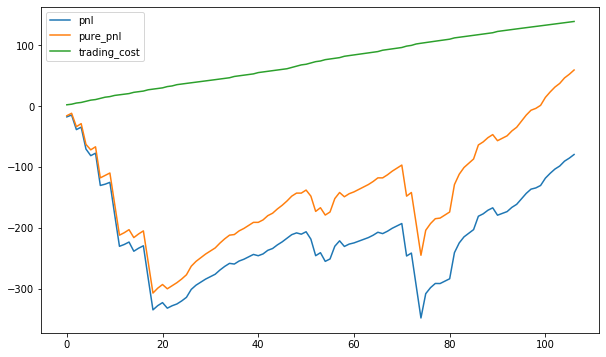

-79.64509999999997

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(np.array(pnl).cumsum(), label='pnl')
plt.plot(np.array(pure_pnl).cumsum(), label='pure_pnl')
plt.plot(np.array(trading_cost).cumsum(), label='trading_cost')
# plt.savefig(os.path.join(trading_result_path, "trading_result.jpg"))
plt.legend()
plt.show()
np.array(pnl).sum()

In [23]:
trading_result_path = "RESULT_CU/traidng_result_pb"
if not os.path.exists(trading_result_path):
    os.mkdir(trading_result_path)
df_record.to_csv(os.path.join(trading_result_path, "_trading_result.csv"), encoding="utf_8_sig")


                           id_A    ask_A  ask_vol_A    bid_A  bid_vol_A  \
date_time                                                                 
2021-05-21 21:00:05.500  pb2107  15795.0       31.0  15785.0        1.0   
2021-05-21 21:00:10.500  pb2107  15765.0       11.0  15755.0       27.0   
2021-05-21 21:00:17.000  pb2107  15740.0       32.0  15735.0        3.0   
2021-05-21 21:00:27.000  pb2107  15735.0        8.0  15730.0       21.0   
2021-05-21 21:00:32.000  pb2107  15720.0       18.0  15710.0       12.0   
...                         ...      ...        ...      ...        ...   
2021-05-24 14:59:23.000  pb2107  15410.0        5.0  15405.0       11.0   
2021-05-24 14:59:34.500  pb2107  15410.0       65.0  15405.0        1.0   
2021-05-24 14:59:45.000  pb2107  15410.0       66.0  15400.0       52.0   
2021-05-24 14:59:53.000  pb2107  15405.0       19.0  15400.0       19.0   
2021-05-24 14:59:59.500  pb2107  15400.0        5.0  15395.0        8.0   

                        

In [ ]:
start_time = pd_date_list['time_stamp'].iloc[24]
end_time = pd_date_list['time_stamp'].iloc[24] + pd.Timedelta("1 day")
data = data_all[(data_all.trading_date >= start_time) & (data_all.trading_date < end_time)]

model = sm.OLS(data.last_A, data.last_B).fit()
print(data)
print(model.params)

beta = model.params['last_B']

eps = data.last_A - data.last_B * beta

Spread = data.last_A - data.last_B

#进入交易

K = 0.55
up_threshold =  K * np.std(eps)
down_threshold = - up_threshold
print(up_threshold)
print(beta)